In [7]:
%autosave 5

Autosaving every 5 seconds


In [8]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [9]:
# Read-In Data

df = pd.read_csv(r'C:\Users\kofil\OneDrive\Desktop\Portfolio Project\movies.csv')

In [10]:
# Check Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6/13/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,7/2/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6/20/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7/2/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7/25/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
# Filled In NA Rows with 0 Values. Extremely Low Percentage of nulls was easier to deal with my making them 0's versus dropping in In[39]

df = df.fillna(0)

In [13]:
# DataTypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Convert Datatype of Budget and Gross to Ints

df['budget'] = df['budget'].astype('int64')

df['gropss'] = df['gross'].astype('int64')

In [15]:
# Check DataTypes to Confirm

# DataTypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
gropss        int64
dtype: object

In [16]:
# Create Correct Year Column

# df['Year_Correct'] = df['released'].astype(str).str[:4]

In [17]:
#df.drop(columns=['Year_Correct'])

In [18]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gropss
5445,Avatar,PG-13,Action,2009,12/18/2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,2847246203
7445,Avengers: Endgame,PG-13,Action,2019,4/26/2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,2797501328
3045,Titanic,PG-13,Drama,1997,12/19/1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,2201647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,12/18/2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,2069521700
7244,Avengers: Infinity War,PG-13,Action,2018,4/27/2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,1/26/1990,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92.0,0
1614,Edge of Sanity,R,Horror,1989,4/14/1989,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0.000000e+00,Allied Vision,85.0,0
1606,"I, Madman",R,Fantasy,1989,4/7/1989,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0.000000e+00,Trans World Entertainment (TWE),89.0,0
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104.0,0


In [19]:
# View all data
# pd.set_option('display.max_rows', None)

In [20]:
# Drop Duplicates

df.drop_duplicates(subset=['company'])

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gropss
0,The Shining,R,Drama,1980,6/13/1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,46998772
1,The Blue Lagoon,R,Adventure,1980,7/2/1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,58853106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6/20/1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,538375067
3,Airplane!,PG,Comedy,1980,7/2/1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,83453539
4,Caddyshack,R,Comedy,1980,7/25/1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,39846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,Black Wall Street Burning,R,Drama,2020,2/7/2020,6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0.0,Notis Studio,78.0,0
7660,Aloha Surf Hotel,0,Comedy,2020,11/5/2020,7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,0,0.0,Abominable Pictures,90.0,0
7661,Love by Drowning,R,Drama,2020,11/6/2020,0.0,0.0,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,0.0,Dow Jazz Films,121.0,0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0.0,Embi Productions,0.0,0


## Budget High Correlation
## Company High Correlation

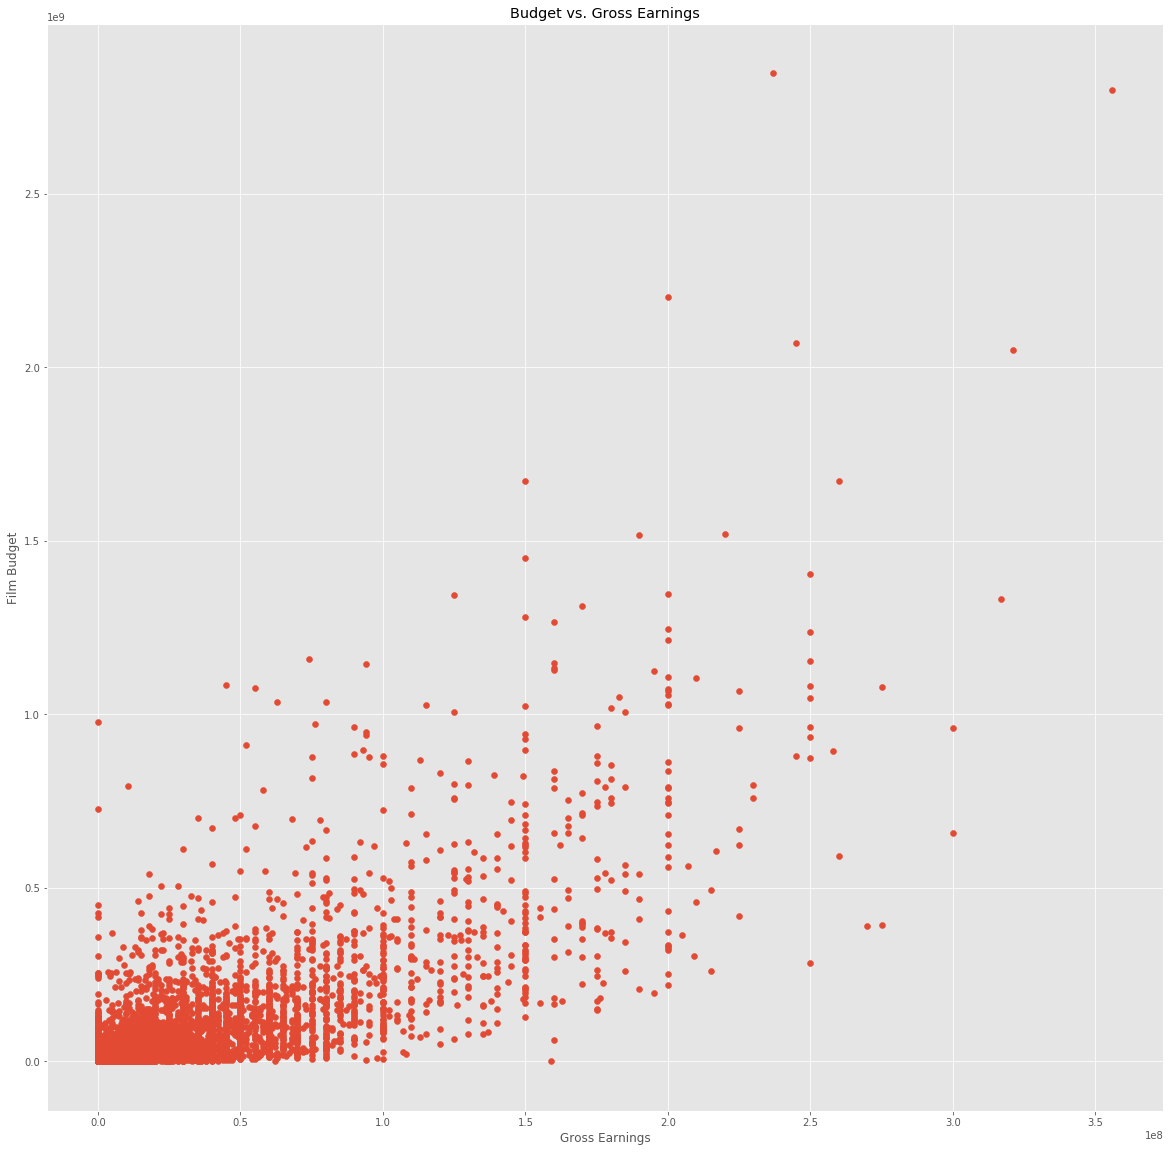

In [21]:
# Scatter Plot with Budget vs Gross

plt.figure(figsize=(20,20))

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Film Budget')

plt.show()

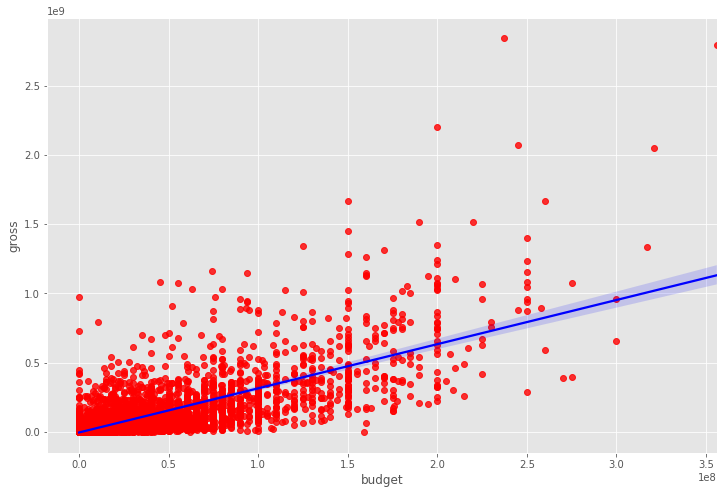

In [22]:
# Plot Budget vs. Gross using Seaborn Regression Plot

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [23]:
# Correlation Table
cm = df_numerized.corr(method='pearson') #pearson, spearman, and kendall methods

NameError: name 'df_numerized' is not defined

In [ ]:
# High Correlation between budget and gross

In [ ]:
plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

sns.heatmap(cm,cmap='coolwarm',linewidths=2, annot=True)

plt.show()


In [ ]:
# Check for outliers in Budget and Gross
# Are there any Outliers?

grossbox = sns.boxplot(x=df["gross"], palette ='colorblind',  fliersize=3.5)

# A LOT of high-level outliers. Appears to be no low-level outliers

In [ ]:
budbox=sns.boxplot(x=df["budget"], palette ='colorblind',  fliersize=3.5)

# A LOT of high-level outliers. Appears to be no low-level outliers

In [39]:
# Convert non-numeric fields to numeric fields in order to run correlation matrixx

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gropss
0,6587,7,6,1980,1632,8.4,927000.0,2589,4015,1048,55,19000000,46998772.0,2320,146.0,46998772
1,5573,7,1,1980,1924,5.8,65000.0,2269,1633,328,56,4500000,58853106.0,732,104.0,58853106
2,5142,5,0,1980,1681,8.7,1200000.0,1111,2568,1746,56,18000000,538375067.0,1541,124.0,538375067
3,286,5,4,1980,1924,7.7,221000.0,1301,2001,2247,56,3500000,83453539.0,1813,88.0,83453539
4,1027,7,4,1980,1969,7.3,108000.0,1054,522,411,56,6000000,39846344.0,1778,98.0,39846344


In [28]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name    name        1.000000
        rating     -0.008069
        genre       0.016355
        year        0.011453
        released    0.008300
                      ...   
gropss  budget      0.750157
        gross       1.000000
        company     0.156745
        runtime     0.244339
        gropss      1.000000
Length: 256, dtype: float64

In [29]:
corr_pairs

name    name        1.000000
        rating     -0.008069
        genre       0.016355
        year        0.011453
        released    0.008300
                      ...   
gropss  budget      0.750157
        gross       1.000000
        company     0.156745
        runtime     0.244339
        gropss      1.000000
Length: 256, dtype: float64

In [37]:
# sp

NameError: name 'sp' is not defined

In [32]:
# high_corr = sorted_pairs[(sorted_pairs) > 0.5]

NameError: name 'sorted_pairs' is not defined